In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("C:/Users/Rahul/Downloads/data.csv")
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
dataset.shape

(11914, 16)

In [6]:
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
#Dropping the irrelevant columns
irr = ['Number of Doors', 'Market Category', 'Popularity', 'Vehicle Style', 'Engine Fuel Type']
dataset.drop(irr, axis = 1, inplace = True)
dataset.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [9]:
dataset = dataset.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","Vehicle Size": "Size", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
dataset.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Size,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [10]:
dataset.shape

(11914, 11)

In [11]:
#Checking the number of duplicates in the dataset
duplicates = dataset[dataset.duplicated()] 
duplicates.shape

(970, 11)

In [12]:
#Since it is large we drop them
dataset = dataset.drop_duplicates()
dataset.shape

(10944, 11)

In [13]:
# Treating the Null values 
# For this we first find the total number of null values under each column
dataset.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
Size             0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [14]:
# Removing the rows where HP and Cylinder is having Null since these Null values do not hold any significance
dataset = dataset.dropna()
dataset.shape

(10846, 11)

In [15]:
dataset.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
Size            0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

In [16]:
# With this this Dataset has been cleaned (Irrelevant columns have been dropped,dupliates and the Null values have been dropped)
#We can now go for analysis

In [19]:
#Looking for what affects the pricing for the vehicles, factores like HP, Size, Drive Mode, MPG-H and what have been the recent trend in the pricing.  

In [63]:
dataset["Price"].describe()

count     10846.000000000
mean      42422.318274018
std       62262.945322453
min        2000.000000000
25%       21905.000000000
50%       30787.500000000
75%       43277.500000000
max     2065902.000000000
Name: Price, dtype: float64

Text(0, 0.5, 'HP')

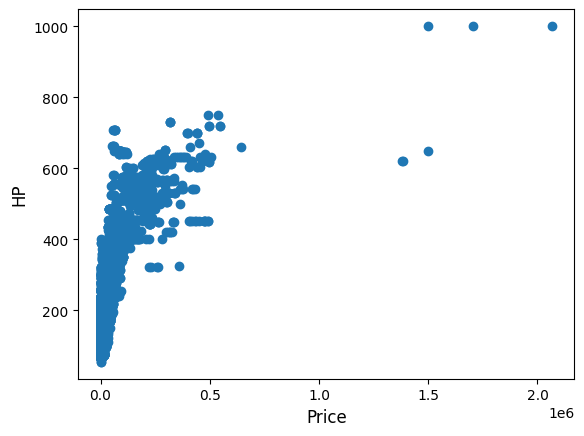

In [49]:
plt.scatter(dataset.Price,dataset.HP)
plt.xlabel("Price", size=12)
plt.ylabel("HP", size=12)

In [47]:
from scipy.stats import pearsonr

In [61]:
stats, p = pearsonr(dataset.Price, dataset.HP)
print(stats,p)

0.6601084298086695 0.0


<Axes: >

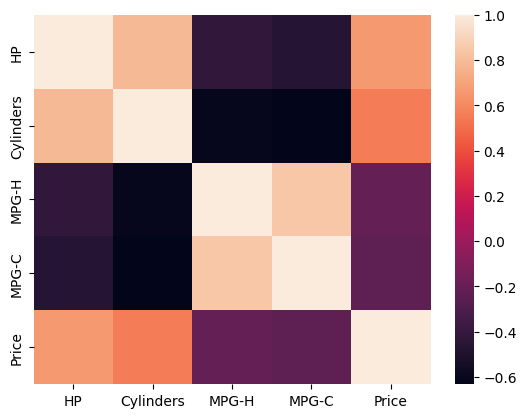

In [159]:
ll = ['Make', 'Year', 'Model', 'Transmission', 'Drive Mode', 'Size']
df = dataset.drop(ll, axis = 1)
sns.heatmap(df.corr())

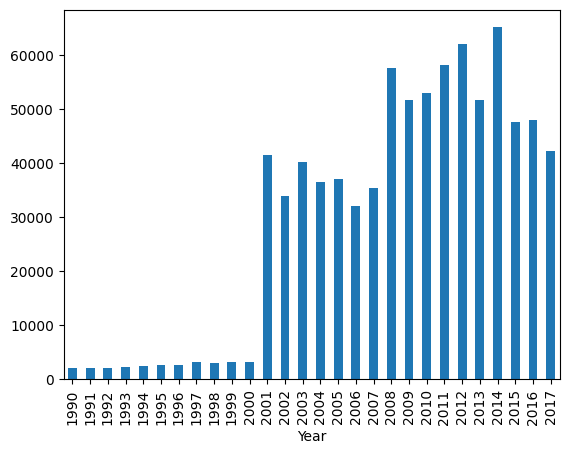

In [30]:
dataset.groupby('Year')['Price'].mean().plot(kind='bar') #Mean car price over the years
plt.show()

In [65]:
from scipy.stats import f_oneway

In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [73]:
model = ols('Price ~ C(Size)', dataset).fit()
oneway = sm.stats.anova_lm(model,typ = 2)
print(oneway)

                           sum_sq              df            F      PR(>F)
C(Size)    610917610960.813476562     2.000000000 79.941121335 0.000000000
Residual 41431615825698.523437500 10843.000000000          NaN         NaN


Text(0, 0.5, 'Avg. MPG-H (Miles per Gallon)')

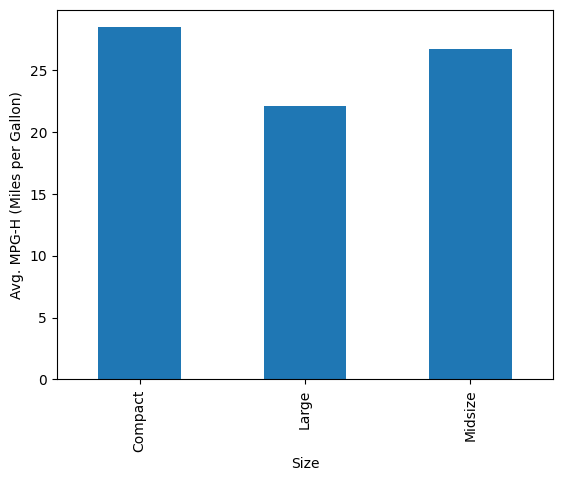

In [172]:
#Mean miles per gallon fuel consumed for different car size
dataset.groupby('Size')['MPG-H'].mean().plot(kind='bar') 
plt.xlabel("Size")
plt.ylabel("Avg. MPG-H (Miles per Gallon)")

In [141]:
# Finding out the popular maufacturers and popular features

In [138]:
dataset['Make'].value_counts()

Make
Chevrolet        1052
Ford              802
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               480
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           164
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugat

In [142]:
dataset['Make'].mode() #Most sold Manufacturers

0    Chevrolet
Name: Make, dtype: object

<Figure size 1000x1000 with 0 Axes>

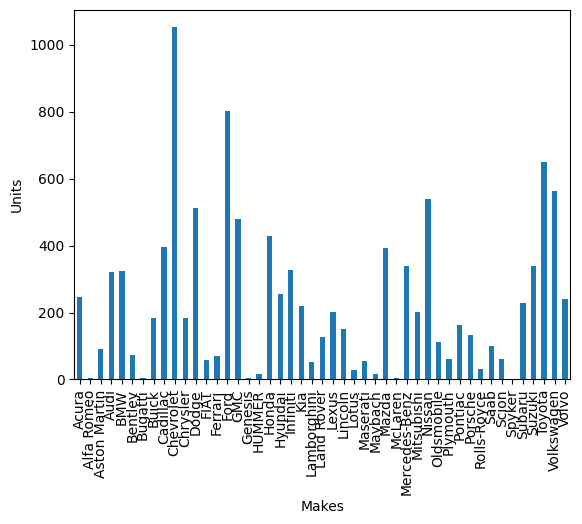

<Figure size 1000x1000 with 0 Axes>

In [150]:
dataset.groupby('Make')['Make'].value_counts().plot(kind='bar') #Bar Chart for manufacturers vs units sold
plt.xlabel("Makes")
plt.ylabel("Units")
plt.figure(figsize=(10, 10))

In [151]:
#Most sold unit is Chevrolet and now analysing for common features like what size is usually sold, Transmission

<Figure size 1000x1000 with 0 Axes>

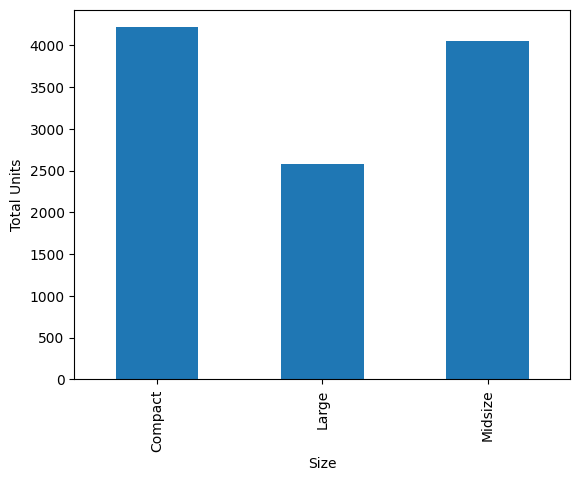

<Figure size 1000x1000 with 0 Axes>

In [153]:
dataset.groupby('Size')['Size'].value_counts().plot(kind='bar') #Bar Chart for Size vs units sold
plt.xlabel("Size")
plt.ylabel("Total Units")
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

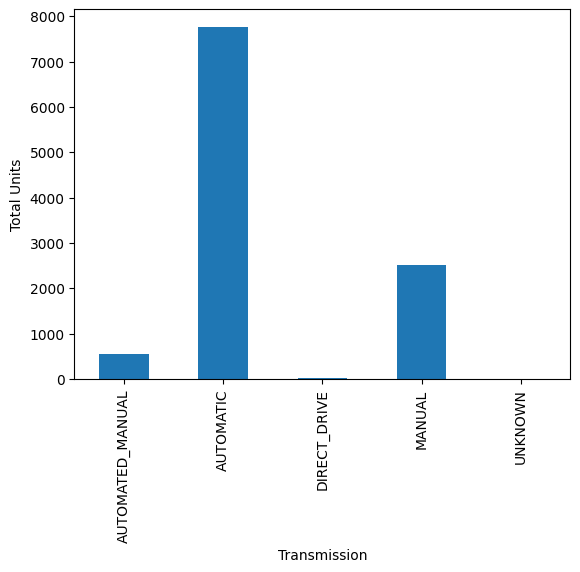

<Figure size 1000x1000 with 0 Axes>

In [154]:
dataset.groupby('Transmission')['Transmission'].value_counts().plot(kind='bar') #Bar Chart for Transmisison vs units sold
plt.xlabel("Transmission")
plt.ylabel("Total Units")
plt.figure(figsize=(10, 10))

In [161]:
model = ols('Price ~ C(Make)', dataset).fit() #To see if the price has any effect on the units sold by a maker
oneway = sm.stats.anova_lm(model,typ = 2)
print(oneway)

                           sum_sq              df             F      PR(>F)
C(Make)  31881928198773.847656250    46.000000000 736.632219452 0.000000000
Residual 10160605237885.431640625 10799.000000000           NaN         NaN


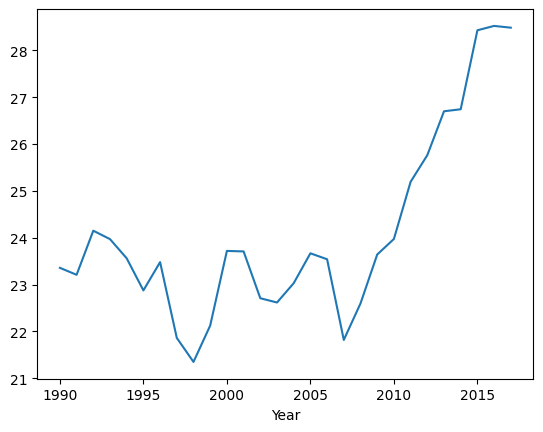

In [165]:
# Fuel Efficiency Trends Over Years
dataset.groupby('Year')['MPG-H'].mean().plot(kind='line')
plt.show()

In [166]:
# K Means Clustering 

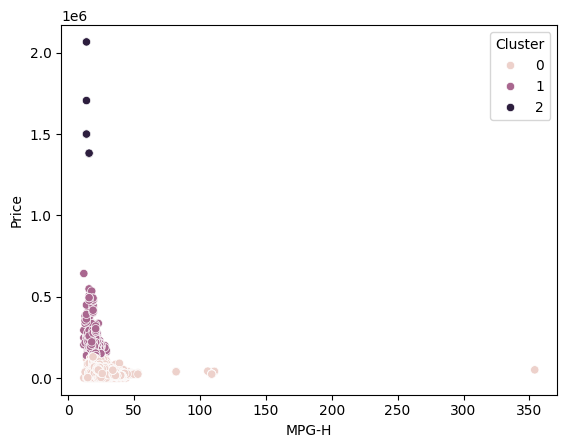

In [170]:
from sklearn.cluster import KMeans
features_for_clustering = ['MPG-H', 'Price']
X = dataset[features_for_clustering]
kmeans = KMeans(n_clusters=3)
dataset['Cluster'] = kmeans.fit_predict(X)
# Visualizing Clusters
sns.scatterplot(x='MPG-H', y='Price', hue='Cluster', data=dataset)
plt.show()

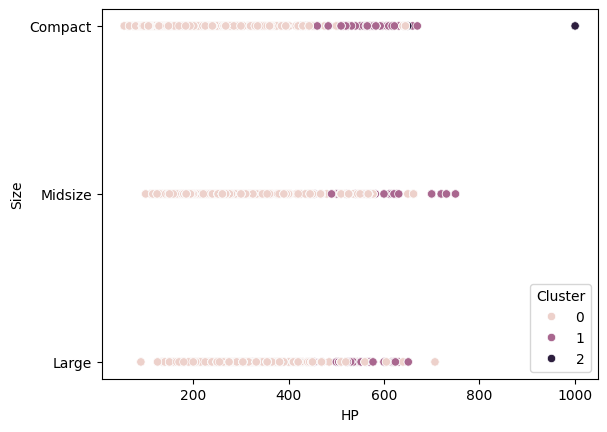

In [171]:
# Market Segmentation based on Engine HP and Vehicle Size
sns.scatterplot(x='HP', y='Size', hue='Cluster', data=dataset)
plt.show()